# Modelo Base: Regresión Logística
Este notebook entrena un modelo base de clasificación binaria usando regresión logística sobre el dataset de readmisión hospitalaria.

In [1]:
# Cargar librerías
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Detectar si es Google Colab
IN_COLAB = 'google.colab' in str(get_ipython())
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    BASE_PATH = '/content/drive/MyDrive/Hospital_Readmission'
else:
    BASE_PATH = '.'

In [2]:
# Define BASE_PATH como el directorio actual
os.chdir(BASE_PATH)
print(f"Directorio actual: {os.getcwd()}")

Directorio actual: c:\Users\jota_\OneDrive\Escritorio\Magister\Deep Learning\DeepNeuralNetworkUSS\Projects\HospitalReadmission\notebooks


In [6]:
# Cargar datos
df = pd.read_csv(os.path.join(BASE_PATH, '../data/hospital_readmission_clean.csv'))
df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,6,3,7,4,65,0,19,0,0,1,...,True,False,True,False,False,False,False,False,False,True
1,3,6,4,10,42,0,14,0,0,0,...,False,False,True,False,False,False,False,False,False,True
2,1,6,7,4,64,3,24,0,0,4,...,False,False,True,False,False,False,False,False,False,True
3,1,3,7,5,42,0,13,2,1,0,...,False,False,True,False,False,False,False,False,True,True
4,1,5,7,6,85,0,22,0,0,3,...,True,False,True,False,False,False,False,False,True,True


In [7]:
# Codificación LabelEncoder para variables categóricas
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

X = df_encoded.drop('readmitted', axis=1)
y = df_encoded['readmitted']

In [8]:
# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [10]:
# Evaluación del modelo
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63     17665
           1       0.63      0.58      0.61     17665

    accuracy                           0.62     35330
   macro avg       0.62      0.62      0.62     35330
weighted avg       0.62      0.62      0.62     35330

ROC AUC: 0.6757360342487543


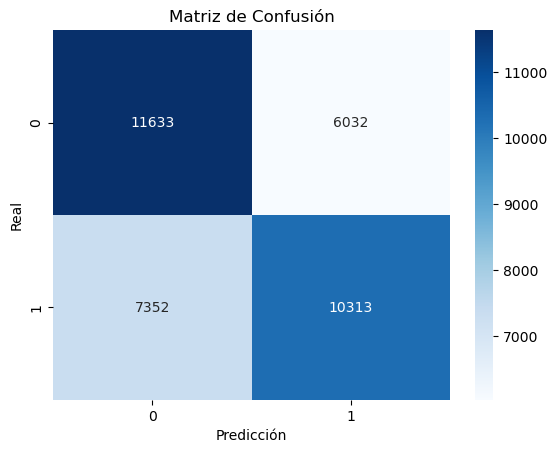

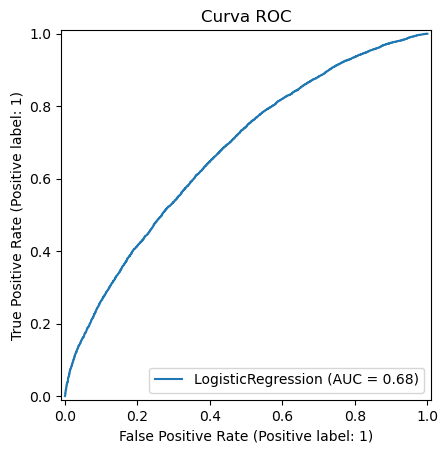

In [11]:
# Matriz de confusión y curva ROC
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Curva ROC")
plt.show()

In [12]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Accuracy train:", accuracy_score(y_train, y_train_pred))
print("Accuracy test :", accuracy_score(y_test, y_test_pred))

Accuracy train: 0.6331535968524887
Accuracy test : 0.6211718086611945


In [ ]:
# Solo variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

#plt.figure(figsize=(12, 10))
#sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
#plt.title("Mapa de correlación entre variables")
#plt.show()

: 

Ranking de variables más influyentes:
diag_1_V58    1.866845
diag_1_386    1.753869
diag_1_566    1.561990
diag_2_782    1.537167
diag_1_218    1.503559
                ...   
diag_2_752    0.000000
diag_3_930    0.000000
diag_3_387    0.000000
diag_3_951    0.000000
diag_3_265    0.000000
Length: 2321, dtype: float64


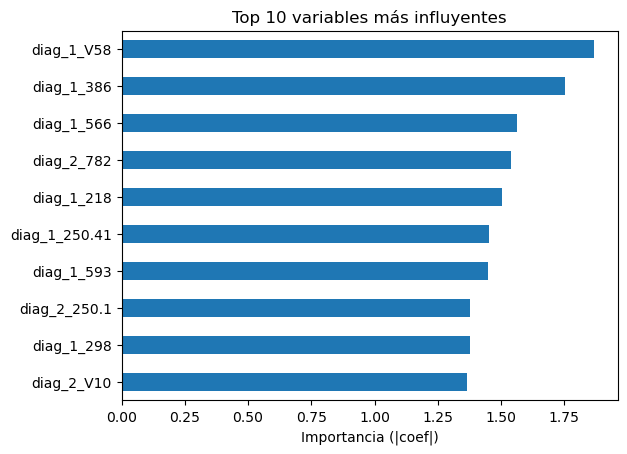

In [13]:
# Ranking por coeficiente de regresión logística
import numpy as np
importance = model.coef_[0]
feature_importance = pd.Series(np.abs(importance), index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("Ranking de variables más influyentes:")
print(feature_importance)

# Gráfico
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 variables más influyentes")
plt.xlabel("Importancia (|coef|)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio (5-fold CV):", cv_scores.mean())
print("Accuracies individuales:", cv_scores)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_